<a href="https://colab.research.google.com/github/srmty09/Implemented-Papers/blob/main/LeNet_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,Flatten,Dense
from keras.models import Sequential

# **Loading the Dataset and perform splitting**

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

# Normalization

In [ ]:
x_train=x_train/255
x_test=x_test/255

# One Hot Encoding the labels

In [ ]:
y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)

# Network Structure

In [ ]:
# Building the model Architecture
model=Sequential()
model.add(Conv2D(6,kernel_size=(5,5),activation="relu",input_shape=(28,28,1))) #24X24X6
model.add(MaxPooling2D(pool_size=(2,2))) # 12X12X6
model.add(Conv2D(16,kernel_size=(5,5),activation="relu")) #8X8X16
model.add(MaxPooling2D(pool_size=(2,2))) #4X4X16
model.add(Conv2D(120,kernel_size=(5,5),activation="relu",padding='same')) # 4X4X120
model.add(Flatten())
model.add(Dense(84,activation="relu"))
model.add(Dense(10,activation="softmax"))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)              │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 12, 12, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 4, 4, 120)      │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 1920)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 84)             │       161,364 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 212,906 (831.66 KB)

 Trainable params: 212,906 (831.66 KB)

 Non-trainable params: 0 (0.00 B)

# Model Compilation

In [ ]:
model.compile(loss=keras.metrics.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=["accuracy"])
history=model.fit(x_train,y_train,batch_size=128,epochs=20,verbose=1,validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 27s 66ms/step - accuracy: 0.8315 - loss: 0.5932 - val_accuracy: 0.9659 - val_loss: 0.1040
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 24s 65ms/step - accuracy: 0.9738 - loss: 0.0854 - val_accuracy: 0.9823 - val_loss: 0.0610
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.9846 - loss: 0.0494 - val_accuracy: 0.9873 - val_loss: 0.0452
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.9868 - loss: 0.0389 - val_accuracy: 0.9860 - val_loss: 0.0471
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 71ms/step - accuracy: 0.9898 - loss: 0.0319 - val_accuracy: 0.9851 - val_loss: 0.0474
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 39s 65ms/step - accuracy: 0.9916 - loss: 0.0259 - val_accuracy: 0.9878 - val_loss: 0.0413
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.9940 - loss: 0.0189 - val_accuracy: 0.9877 - val_loss: 0.0444
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 73ms/step - accuracy: 0.9946 - loss: 0.0165 - 

In [ ]:
score=model.evaluate(x_test,y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9849 - loss: 0.0628


In [ ]:
print("Test Loss",score[0])
print("Test Accuracy",score[1])

Test Loss 0.04723808169364929
Test Accuracy 0.9878000020980835


In [ ]:
import matplotlib.pyplot as plt

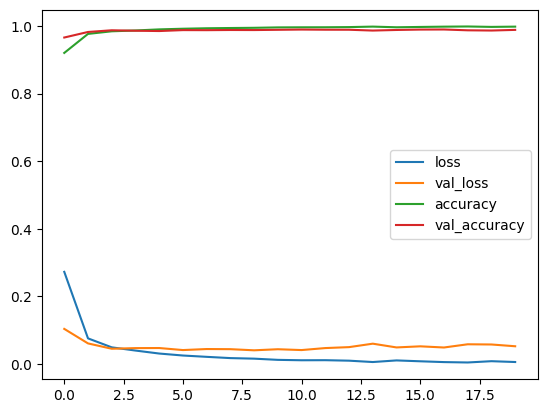

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["loss","val_loss","accuracy","val_accuracy"])